Import all python modules needed for scientific calculations, including math, matplotlib, and numpy.

In [38]:
import math
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Define frequently used constants, where

+ `z` is the amount of time steps taken;

+ `G` is the gravitaional constant $G$ with unit of N · m/kg;

+ `D_EM` is the distance between the center of the Earth and the Moon with unit of m;

+ `angleCF` is the conversion factor from degrees to radians with unit of rad/deg; and

+ `pi` and `twopi` are shortcut variables.

Changing the constant `z` will alter the time of the simulation.

In [39]:
z = int(30000) #864000
G = 6.67e-11
D_EM = 3.84399e+8
angleCF = math.pi / 180
pi = math.pi
twopi = 2 * math.pi

Create an empty list `t` for time with length of `z` and set initial time `t[0]` as 0.
Define the time step $dt$.

In [40]:
t = [None]*z
t[0] = 0
dt = 1

Create a class called `mass`. 
Initialize by defining the properties of the mass, where

+ `mass` is mass of the mass with unit of kg;

+ `mu` is the gravitational parameter $\mu = G (m_1 + m_2)$ with unit of N · m;

+ `x[0]` is the initial x component of position vector with unit of m; and

+ `y[0]` is the initial y component of position vector with unit of m.

In [41]:
class Mass:
    def __init__(self, mass, x0 ,y0):
        self.mass = mass
        self.mu = G * self.mass
        self.x = [None]*z
        self.y = [None]*z
        self.x[0] = x0
        self.y[0] = y0

Create a class called `CelestialBody` that inherits the properties of `Mass`. Initialize by defining the properties of the celestial body, where

+ `radius` is the radius of the celestial body with unit of m;

+ `period` is the period of the celestial body that orbits around another celestial body with unit of s;

+ `dE` is the distance between the celestial body and the Earth with unit of m; and

+ `soi` is the sphere of influence of the celestial body with respect to the Earth defined by $$r_{SOI} = R (\frac{m_c}{m_e}) ^ \frac{2}{5}$$ with unit of m, where $m_c$ is the mass of the celestial body, $m_e$ is the mass of the Earth, $R$ is the radius of the celestial body.

Create method `Position()` under class `CelestialBody` to calculate the position of the celestial body. For a celestial body that orbit in a circle,

+ the x component of the position vector `x` is defined by $$x(t) = r\cos(\frac{2\pi}{T}t + \arctan(\frac{y}{x}))$$ with unit of m, where $r$ is the distance between the center of the celestial bodies, $T$ is the period of orbiting, $t$ is the current time, and $\arctan(\frac{y}{x})$ is the initial angle of the celestial body with respect to the Earth;

+ the y component of the position vector `y` is defined by $$y(t) = r\sin(\frac{2\pi}{T}t + \arctan(\frac{y}{x}))$$ with unit of m and similar parameters.

In [53]:
class CelestialBody(Mass):
    def Settings(self, radius, period, dE): # input period with unit of days
        self.radius = radius
        self.period = period * 24 * 60 * 60.0
        self.dE = dE
        self.soi = (self.mass / Earth.mass) ** 0.4 * self.radius
        
    def Position(self):
        self.x[i+1] = (self.dE + Earth.radius) * \
        math.cos(2 * math.pi / self.period * t[i+1] + \
                 math.atan(self.y[0] / self.x[0]))
        self.y[i+1] = (self.dE + Earth.radius) * \
        math.sin(2 * math.pi / self.period * t[i+1] + \
                 math.atan(self.y[0] / self.x[0]))

Create `Earth` object and `Moon` object under `CelestialBody` class and define their initial values.

In [54]:
Earth = CelestialBody(5.97237e+24, 0.0, 0.0)
Earth.Settings(6.3781e+6, 365, 0.0)
Moon = CelestialBody(7.342e+22, 364658999.01580966, 140465498.68632427) # 3.84399e+8 + Earth.radius, 0.0
Moon.Settings(1.7371e+6, 30, 3.84399e+8)

Create a class called `Rocket` that inherits the properties of `Mass`. Initialize by defining the properties of the celestial body, where

+ `crash` is a Boolean variable that indicates the status of the rocket;

+ `procedureTurnTime` is the time, with unit of s, when the rocket performs procedure turn;

+ `Turnoff` is the time, with unit of s, when the rocket turns off its engine;

+ `TargetAltitude` is the distance, with unit of m, between the Earth surface and the desired lower Earth orbit;

+ `TargetAltitude2` is the distance, with unit of m, between the Earth surface and the desired higher Earth orbit; and

+ `TargetMoonAltitude` is the distance, with unit of m, between the Moon surface and the desired lower lunar orbit.

The `Rocket` class also has list variables to store calculated data, where

+ `Alt_Earth` is a list that stores the distance between the Earth surface and the rocket;

+ `Mx` is  a list that stores the x component of the distance between the Moon surface and the rocket;

+ `My` is  a list that stores the y component of the distance between the Moon surface and the rocket;

+ `Alt_Moon` is  a list that stores the the distance between the Moon surface and the rocket;

+ `v_x` is  a list that stores the x component of the velocity vector;

+ `v_y` is  a list that stores the y component of the velocity vector;

+ `v` is  a list that stores the magnitude of the velocity vector;

+ `theta` is  a list that stores the angle of the rocket with respect to the center of the Earth (origin), that is, the relative position of the rocket with respect to the Earth;

+ `epsilon` is  a list that stores the angle of the rocket with respect to x-axis, that is, the direction of the rocket's velocity vector;

+ `phi` is  a list that stores the angle of the rocket with respect to the center of the Moon, that is, the relative position of the rocket with respect to the Moon;

+ `Fg_Earth` is  a list that stores the gravitational force excerted by the Earth;

+ `Fg_Moon` is  a list that stores the gravitational force excerted by the Moon;

+ `Fr` is  a list that stores the instantaneous thrust of the rocket;

+ `a_x` is  a list that stores the x component of the acceleration vector;

+ `a_y` is  a list that stores the y component of the acceleration vector;

+ `a` is  a list that stores the magnitude of the acceleration vector.

`INCOMPLETE`

The position function defines and calculates the position of the rocket, where

+ `x` is defined by $$x(t) = x_0 + v_x t + \frac{1}{2} a_x t^2;$$

+ `y` is defined by $$y(t) = y_0 + v_y t + \frac{1}{2} a_y t^2;$$

+ `Alt_Earth` is defined by $$Alt_e = \sqrt{x^2 + y^2} - R_e,$$ where $x$ is the x component of the rocket's position vector, $y$ is the y component of the rocket's position vector, and $R_e$ is the radius of the Earth; and

+ `Alt_Moon_x` is defined conditionally according to the position of the Moon and the rocket:

    + If the rocket and the Moon are both in the positive or negative part of the x-axis, and the Moon is farther from the Earth, the x component of the distance between the Moon surface and the rocket is $$Alt_{mx} = |x| - |x_m|,$$ where $x_r$ is the rocket's x component of position vector, and $x_m$ is the Moon's x component of position vector.

`INCOMPLETE`

The velocity function defines and calculates the velocity of the rocket, where

+ `v_x` is defined by $$v_{x}(t) = v_{x0} + a_{x}t;$$

+ `v_y` is defined by $$v_{y}(t) = v_{y0} + a_{y}t;$$ and

+ `v` is defined by $$v = \sqrt{v_x^2 + v_y^2}.$$

The force function defines and calculates the force of the rocket, where

+ `Fg_Earth` is defined by $$F_{e} = - G\frac{m_e m}{r^2} = - G\frac{m_e m}{x^2 + y^2};$$

+ `Fg_Moon` is defined by $$F_{m} = - G\frac{m_m m}{r^2} = - G\frac{m_m m}{x^2 + y^2};$$

+ `Fr` is defined conditionally:

    + If the time is before the `Turnoff` time, $F_r = $ `Fr[0]`.
    
    + If the time is not before the `Turnoff` time, $F_r = 0$.

The normal acceleration function defines and calculates the acceleration of the rocket, where

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos(\theta) + F_m \cos(\phi) + F_r \cos(\epsilon)}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin(\theta) + F_m \sin(\phi) + F_r \sin(\epsilon)}{m};$$ and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2}.$$

The procedure turn function defines and calculates the acceleration of the rocket when it performs procedure turn, where the engine of the rocket tilts $\frac{\pi}{6}$ rad, thus

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos(\theta) + F_m \cos(\phi) + F_r \cos(\epsilon + \frac{\pi}{6})}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin(\theta) + F_m \sin(\phi) + F_r \sin(\epsilon + \frac{\pi}{6})}{m};$$and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2}.$$

The thrust 1 function defines and calculates the acceleration of the rocket when it is pushed to the first low altitude orbit around the Earth, where the engine of the rocket tilts $\frac{\pi}{2}$ rad, thus

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos(\theta) + F_m \cos(\phi) + F_r \cos(\epsilon + \frac{\pi}{2})}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin(\theta) + F_m \sin(\phi) + F_r \sin(\epsilon + \frac{\pi}{2})}{m};$$and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2}.$$

The thrust 2 function redefines the instantaneous thrust and defines and calculates the acceleration of the rocket when it is pushed to the eliptical transfer orbit, where

+ The desired angular momentum $h$ of the rocket is $$h = \sqrt{2\mu} \sqrt{\frac{r_a r_p}{r_a + r_p}},$$ where $r_a$ is the apogee and $r_p$ is the perigee. The desired velocity $v_d$ is $$v_d = \frac{h}{r_p}.$$ The delta-v $\Delta v$ is $$\Delta v = v_d - v,$$ so the instantaneous acceleration over $dt$ is $$\Delta a = \frac{\Delta v}{dt}.$$ Thus, `Fr` is defined by $$\boxed{F_r = \frac{m(\frac{\sqrt{2\mu} \sqrt{\frac{r_a r_p}{r_a + r_p}}}{r_p} - v)}{dt}}.$$

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos(\theta) + F_m \cos(\phi) + F_r \cos(\epsilon)}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin(\theta) + F_m \sin(\phi) + F_r \sin(\epsilon)}{m};$$and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2}.$$

The thrust 3 function redefines the instantaneous thrust and defines and calculates the acceleration of the rocket when it is pushed to higher altitude circular orbit around the Earth, where

+ The desired angular momentum $h$ of the rocket is $$h = \sqrt{\mu r},$$ where $r$ is the radius of the circular orbit. Similarly, `Fr` is defined by $$\boxed{F_r = \frac{m(\frac{\sqrt{\mu r}}{r} - v)}{dt}}.$$

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos(\theta) + F_m \cos(\phi) + F_r \cos(\epsilon)}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin(\theta) + F_m \sin(\phi) + F_r \sin(\epsilon)}{m};$$and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2}.$$

The procedure turn function defines and calculates the acceleration of the rocket when it performs procedure turn. The thrust vector controlled engine will minimize the time for the maneuver and fully utilize the thrust. The parameters

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos(\theta) + F_m \cos(\phi) + F_r \cos(\epsilon + \beta)}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin(\theta) + F_m \sin(\phi) + F_r \sin(\epsilon + \beta)}{m};$$and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2},$$ where $\beta$ is the angle between $\mathbf{v}$ and $\mathbf{a}$.

To find $\beta$, suppose the velocity vector is $\mathbf{v}$ and the desire velocity vector is  $\mathbf{v_d}$, where $\|\mathbf{v}\| = \|\mathbf{v_d}\|$, so the acceleration vector $\mathbf{a}$ should be: $$\mathbf{a} = \mathbf{v_d} - \mathbf{v} = \langle v_{dx} - v_x, v_{dy} - v_y\rangle = \langle \|\mathbf{v}\| \cos{\alpha} - v_x, \|\mathbf{v}\| \sin{\alpha} - v_y\rangle,$$ where $\alpha$ is `procedureTurnAngle`, the angle of the procedure turn.

To find the angle $\beta$ between $\mathbf{v}$ and $\mathbf{a}$, use the vector angle formula $$\cos \beta = \frac{\mathbf{a} \cdot \mathbf{v}}{\|\mathbf{a}\| \|\mathbf{v}\|} = \frac{a_x v_x + a_y v_y}{\sqrt{a_x^2 + a_y^2} \sqrt{v_x^2 + v_y^2}};$$ write it in terms of the known values: $$\beta = \arccos (\frac{(\|\mathbf{v}\| \cos{\alpha} - v_x)v_x + (\|\mathbf{v}\| \sin{\alpha} - v_y)v_y}{\sqrt{(\|\mathbf{v}\| \cos{\alpha} - v_x)^2 + (\|\mathbf{v}\| \sin{\alpha} - v_y)^2} \|\mathbf{v}\|}).$$

The following graphs illustrate the vectors $\mathbf{v}$, $\mathbf{a}$, and $\mathbf{v_d}$, as well as the angle between them.

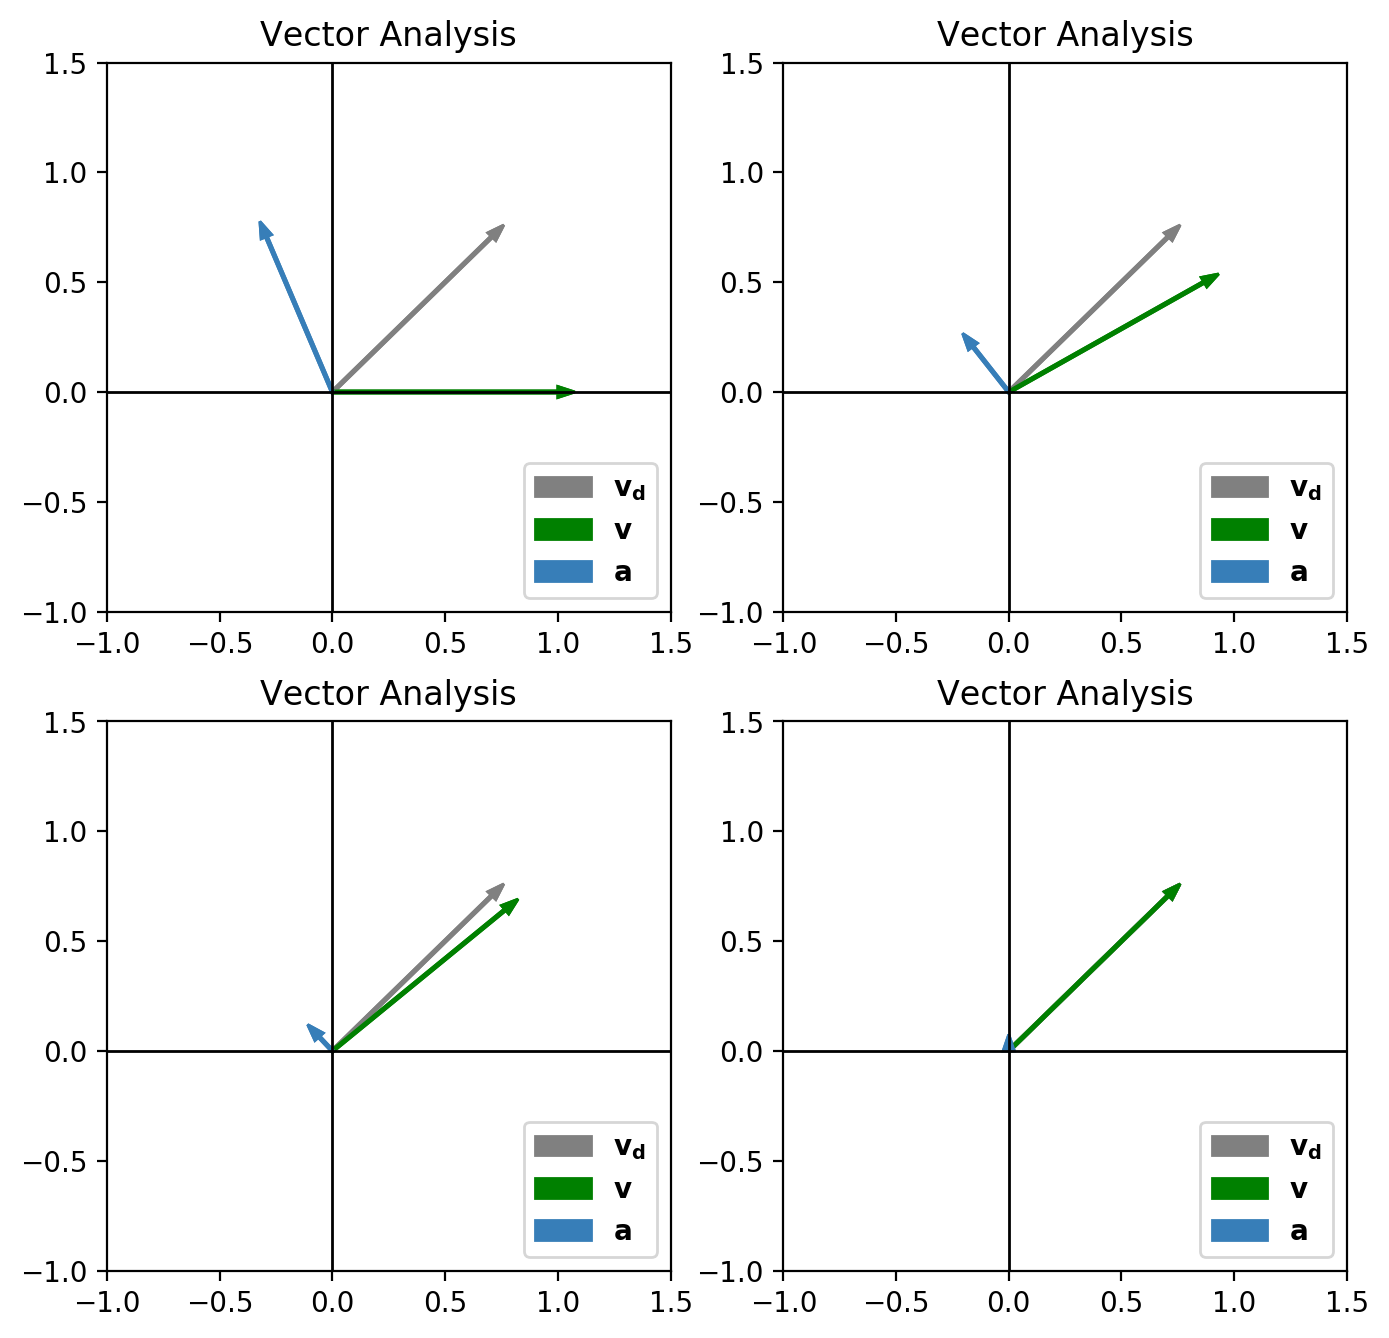

In [201]:
fig=plt.figure(figsize=(8,8), dpi = 200)
ax=fig.add_subplot(2,2,1)
plt.title('Vector Analysis')
plt.xlim(xmin=-1)
plt.xlim(xmax=1.5)
plt.ylim(ymin=-1)
plt.ylim(ymax=1.5)
plt.hlines(0, -2, 3 , "black", linewidth=1.0)
plt.vlines(0, -2, 3 , "black", linewidth=1.0)
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2, width=0.01, head_width=0.05, label='$\mathbf{v_d}$', color='gray'))
ax.add_patch(plt.arrow(0,0,1,0, width=0.01, head_width=0.05, label='$\mathbf{v}$', color='green'))
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2-1,math.sqrt(2)/2, width=0.01, head_width=0.05, label='$\mathbf{a}$', color='#377EB8'))
ax.legend(loc='lower right')
#
ax=fig.add_subplot(2,2,2)
plt.title('Vector Analysis')
plt.xlim(xmin=-1)
plt.xlim(xmax=1.5)
plt.ylim(ymin=-1)
plt.ylim(ymax=1.5)
plt.hlines(0, -2, 3 , "black", linewidth=1.0)
plt.vlines(0, -2, 3 , "black", linewidth=1.0)
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2, width=0.01, head_width=0.05, label='$\mathbf{v_d}$', color='gray'))
ax.add_patch(plt.arrow(0,0,math.sqrt(3)/2,0.5, width=0.01, head_width=0.05, label='$\mathbf{v}$', color='green'))
ax.add_patch(plt.arrow(0,0,(math.sqrt(2) - math.sqrt(3))/2, math.sqrt(2)/2 - 0.5, width=0.01, head_width=0.05, label='$\mathbf{a}$', color='#377EB8'))
ax.legend(loc='lower right')
#
ax=fig.add_subplot(2,2,3)
plt.title('Vector Analysis')
plt.xlim(xmin=-1)
plt.xlim(xmax=1.5)
plt.ylim(ymin=-1)
plt.ylim(ymax=1.5)
plt.hlines(0, -2, 3 , "black", linewidth=1.0)
plt.vlines(0, -2, 3 , "black", linewidth=1.0)
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2, width=0.01, head_width=0.05, label='$\mathbf{v_d}$', color='gray'))
ax.add_patch(plt.arrow(0,0,math.cos(40*angleCF),math.sin(40*angleCF), width=0.01, head_width=0.05, label='$\mathbf{v}$', color='green'))
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2 - math.cos(40*angleCF), math.sqrt(2)/2 - math.sin(40*angleCF), width=0.01, head_width=0.05, label='$\mathbf{a}$', color='#377EB8'))
ax.legend(loc='lower right')
#
ax=fig.add_subplot(2,2,4)
plt.title('Vector Analysis')
plt.xlim(xmin=-1)
plt.xlim(xmax=1.5)
plt.ylim(ymin=-1)
plt.ylim(ymax=1.5)
plt.hlines(0, -2, 3 , "black", linewidth=1.0)
plt.vlines(0, -2, 3 , "black", linewidth=1.0)
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2, width=0.01, head_width=0.05, label='$\mathbf{v_d}$', color='gray'))
ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2, width=0.01, head_width=0.05, label='$\mathbf{v}$', color='green'))
ax.add_patch(plt.arrow(0,0,0,0, width=0.01, head_width=0.05, label='$\mathbf{a}$', color='#377EB8'))
ax.legend(loc='lower right')
plt.show()

In [132]:
class Rocket(Mass):
    def Settings(self, crash, procedureTurnTime, Turnoff, TargetAltitude, \
                 TargetAltitude2, TargetMoonAltitude, v_x0, v_y0, \
                 theta, epsilon, Fr):
        self.crash = crash
        self.procedureTurnTime = procedureTurnTime
        self.Turnoff = Turnoff
        self.TargetAltitude = TargetAltitude
        self.TargetAltitude2 = TargetAltitude2
        self.TargetMoonAltitude = TargetMoonAltitude
        self.Alt_Earth = [None]*z
        self.Alt_Moon_x = [None]*z
        self.Alt_Moon_y = [None]*z
        self.Alt_Moon = [None]*z
        self.v_x = [None]*z
        self.v_y = [None]*z
        self.v = [None]*z
        self.theta = [None]*z
        self.epsilon = [None]*z 
        self.phi = [None]*z 
        self.Fg_Earth = [None]*z
        self.Fg_Moon = [None]*z
        self.Fr = [None]*z
        self.a_x = [None]*z
        self.a_y = [None]*z
        self.a = [None]*z
        self.Alt_Earth[0] = 0
        if (Moon.x[0] >= 0 and self.x[0] >= 0 and Moon.x[0] < self.x[0]) or \
        (Moon.x[0] <= 0 and self.x[0] <= 0 and Moon.x[0] > self.x[0]):
            self.Alt_Moon_x[0] = abs(self.x[0]) - abs(Moon.x[0])
        elif (Moon.x[0] >= 0 and self.x[0] >= 0 and Moon.x[0] > self.x[0]) or \
        (Moon.x[0] <= 0 and self.x[0] <= 0 and Moon.x[0] < self.x[0]):
            self.Alt_Moon_x[0] = abs(Moon.x[0]) - abs(self.x[0])
        elif (Moon.x[0] >= 0 and self.x[0] <= 0) or \
        (Moon.x[0] <= 0 and self.x[0] >= 0):
            self.Alt_Moon_x[0] = abs(Moon.x[0]) + abs(self.x[0])
        else:
            print "self.Alt_Moon_x pitfall!!"
            pass
        if (Moon.y[0] >= 0 and self.y[0] >= 0 and Moon.y[0] < self.y[0]) or \
        (Moon.y[0] <= 0 and self.y[0] <= 0 and Moon.y[0] > self.y[0]):
            self.Alt_Moon_y[0] = abs(self.y[0]) - abs(Moon.y[0])
        elif (Moon.y[0] >= 0 and self.y[0] >= 0 and Moon.y[0] > self.y[0]) or \
        (Moon.y[0] <= 0 and self.y[0] <= 0 and Moon.y[0] < self.y[0]):
            self.Alt_Moon_y[0] = abs(Moon.y[0]) - abs(self.y[0])
        elif (Moon.y[0] >= 0 and self.y[0] <= 0) or \
        (Moon.y[0] <= 0 and self.y[0] >= 0):
            self.Alt_Moon_y[0] = abs(Moon.y[0]) + abs(self.y[0])
        else:
            print "self.Alt_Moon_y pitfall!!"
            pass
        self.Alt_Moon[0] = math.sqrt(self.Alt_Moon_x[0]**2 + self.Alt_Moon_y[0]**2) - Moon.radius
        self.v_x[0] = v_x0
        self.v_y[0] = v_y0
        self.v[0] = math.sqrt(self.v_x[0]**2 + self.v_y[0]**2)
        self.theta[0] = theta
        self.epsilon[0] = epsilon
        if self.x[0] >= Moon.x[0] and self.y[0] >= Moon.y[0]:
            self.phi[0] = math.atan(self.Alt_Moon_y[0] / self.Alt_Moon_x[0])
        elif self.x[0] <= Moon.x[0] and self.y[0] >= Moon.y[0]:
            self.phi[0] = math.pi + math.atan(self.Alt_Moon_y[0] / (-self.Alt_Moon_x[0]))
        elif self.x[0] <= Moon.x[0] and self.y[0] <= Moon.y[0]:
            self.phi[0] = math.pi + math.atan((-self.Alt_Moon_y[0]) / (-self.Alt_Moon_x[0]))
        elif self.x[0] >= Moon.x[0] and self.y[0] <= Moon.y[0]:
            self.phi[0] = 2 * math.pi + math.atan((-self.Alt_Moon_y[0]) / self.Alt_Moon_x[0])
        else:
            print "self.phi pitfall!!"
            pass
        self.Fg_Earth[0] = G * Earth.mass * self.mass / (self.x[0]**2 + self.y[0]**2)
        self.Fg_Moon[0] = G * Moon.mass * self.mass / \
        ((self.Alt_Moon_x[0] + Moon.radius)**2 + (self.Alt_Moon_y[0] + Moon.radius)**2)
        self.Fr[0] = Fr
        self.a_x[0] = (-self.Fg_Earth[0] * math.cos(self.theta[0]) + \
                self.Fr[0] * math.cos(self.epsilon[0])) / self.mass
        self.a_y[0] = (-self.Fg_Earth[0] * math.sin(self.theta[0]) + \
                self.Fr[0] * math.sin(self.epsilon[0])) / self.mass
        self.a[0] = math.sqrt(self.a_x[0]**2 + self.a_y[0]**2)
        self.Acceleration_ProcedureTurn_called = 0
        self.Acceleration_Thrust1_1_called = 0
        self.Acceleration_Thrust1_2_called = 0
        self.Acceleration_Thrust2_1_called = 0
        self.Acceleration_Thrust2_2_called = 0
        self.Acceleration_Thrust3_1_called = 0
        self.Acceleration_Thrust3_2_called = 0
        self.Acceleration_Thrust4_1_called = 0
        self.Acceleration_Thrust5_1_called = 0
        self.Acceleration_Thrust6_1_called = 0
        
    def Position(self):
        self.x[i+1] = self.x[i] + self.v_x[i] * dt + 0.5 * self.a_x[i] * dt**2
        self.y[i+1] = self.y[i] + self.v_y[i] * dt + 0.5 * self.a_y[i] * dt**2
        self.Alt_Earth[i+1] = math.sqrt(self.x[i+1]**2 + self.y[i+1]**2) - Earth.radius
        if (Moon.x[i+1] > 0 and self.x[i+1] > 0 and Moon.x[i+1] < self.x[i+1]) or \
        (Moon.x[i+1] < 0 and self.x[i+1] < 0 and Moon.x[i+1] > self.x[i+1]):
            self.Alt_Moon_x[i+1] = abs(self.x[i+1]) - abs(Moon.x[i+1])
        elif (Moon.x[i+1] > 0 and self.x[i+1] > 0 and Moon.x[i+1] > self.x[i+1]) or \
        (Moon.x[i+1] < 0 and self.x[i+1] < 0 and Moon.x[i+1] < self.x[i+1]):
            self.Alt_Moon_x[i+1] = abs(Moon.x[i+1]) - abs(self.x[i+1])
        elif (Moon.x[i+1] > 0 and self.x[i+1] < 0) or \
        (Moon.x[i+1] < 0 and self.x[i+1] > 0):
            self.Alt_Moon_x[i+1] = abs(Moon.x[i+1]) + abs(self.x[i+1])
        else:
            print "self.Alt_Moon_x pitfall!!"
            pass
        if (Moon.y[i+1] > 0 and self.y[i+1] >= 0 and Moon.y[i+1] < self.y[i+1]) or \
        (Moon.y[i+1] < 0 and self.y[i+1] <= 0 and Moon.y[i+1] > self.y[i+1]):
            self.Alt_Moon_y[i+1] = abs(self.y[i+1]) - abs(Moon.y[i+1])
        elif (Moon.y[i+1] > 0 and self.y[i+1] >= 0 and Moon.y[i+1] > self.y[i+1]) or \
        (Moon.y[i+1] < 0 and self.y[i+1] <= 0 and Moon.y[i+1] < self.y[i+1]):
            self.Alt_Moon_y[i+1] = abs(Moon.y[i+1]) - abs(self.y[i+1])
        elif (Moon.y[i+1] > 0 and self.y[i+1] <= 0) or \
        (Moon.y[i+1] < 0 and self.y[i+1] >= 0):
            self.Alt_Moon_y[i+1] = abs(Moon.y[i+1]) + abs(self.y[i+1])
        else:
            print "self.Alt_Moon_y pitfall!!"
            pass
        self.Alt_Moon[i+1] = math.sqrt(self.Alt_Moon_x[i+1]**2 + self.Alt_Moon_y[i+1]**2) - Moon.radius

    def Velocity(self):
        self.v_x[i+1] = self.v_x[i] + self.a_x[i] * dt
        self.v_y[i+1] = self.v_y[i] + self.a_y[i] * dt
        self.v[i+1] = math.sqrt(self.v_x[i+1]**2 + self.v_y[i+1]**2)

    def Force(self):
        self.Fg_Earth[i+1] = - G * Earth.mass * self.mass / (self.x[i+1]**2 + self.y[i+1]**2)
        self.Fg_Moon[i+1] =  - G * Moon.mass * self.mass / \
        ((self.Alt_Moon_x[i+1] + Moon.radius)**2 + (self.Alt_Moon_y[i+1] + Moon.radius)**2)
        if t[i+1] < Stamina.Turnoff:
            self.Fr[i+1] = self.Fr[0]
        else:
            self.Fr[i+1] = 0

    def Angles(self):   
        if self.v_x[i+1] > 0 and self.v_y[i+1] > 0:
            self.epsilon[i+1] = math.atan(self.v_y[i+1] / self.v_x[i+1])
        elif self.v_x[i+1] < 0 and self.v_y[i+1] > 0:
            self.epsilon[i+1] = math.pi + math.atan(self.v_y[i+1] / self.v_x[i+1])
        elif self.v_x[i+1] < 0 and self.v_y[i+1] < 0:
            self.epsilon[i+1] = math.pi + math.atan(self.v_y[i+1] / self.v_x[i+1])
        elif self.v_x[i+1] > 0 and self.v_y[i+1] < 0:
            self.epsilon[i+1] = 2 * math.pi + math.atan(self.v_y[i+1] / self.v_x[i+1])
        else:
            print "epsilon pitfall!!"
            pass
        if self.x[i+1] > 0 and self.y[i+1] > 0:
            self.theta[i+1] = math.atan(self.y[i+1] / self.x[i+1])
        elif self.x[i+1] < 0 and self.y[i+1] > 0:
            self.theta[i+1] = math.pi + math.atan(self.y[i+1] / self.x[i+1])
        elif self.x[i+1] < 0 and self.y[i+1] < 0:
            self.theta[i+1] = math.pi + math.atan(self.y[i+1] / self.x[i+1])
        elif self.x[i+1] > 0 and self.y[i+1] < 0:
            self.theta[i+1] = 2 * math.pi + math.atan(self.y[i+1] / self.x[i+1])
        else:
            print "theta pitfall!!"
            pass
        if self.x[i+1] > Moon.x[i+1] and self.y[i+1] > Moon.y[i+1]:
            self.phi[i+1] = math.atan(self.Alt_Moon_y[i+1] / self.Alt_Moon_x[i+1])
        elif self.x[i+1] < Moon.x[i+1] and self.y[i+1] > Moon.y[i+1]:
            self.phi[i+1] = math.pi + math.atan(self.Alt_Moon_y[i+1] / (-self.Alt_Moon_x[i+1]))
        elif self.x[i+1] < Moon.x[i+1] and self.y[i+1] < Moon.y[i+1]:
            self.phi[i+1] = math.pi + math.atan((-self.Alt_Moon_y[i+1]) / (-self.Alt_Moon_x[i+1]))
        elif self.x[i+1] > Moon.x[i+1] and self.y[i+1] < Moon.y[i+1]:
            self.phi[i+1] = 2 * math.pi + math.atan((-self.Alt_Moon_y[i+1]) / self.Alt_Moon_x[i+1])
        else:
            print "self.phi pitfall!!"
            pass

    def Acceleration_Normal(self):
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) - \
                         self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) - \
                         self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)

    def Acceleration_ProcedureTurn(self):
        self.Acceleration_ProcedureTurn_called += 1
        angleChange = math.acos(((self.v[i+1] * math.cos(self.procedureTurnAngle) \
                                   - self.v_x[i+1]) * self.v_x[i+1] + \
                                  (self.v[i+1] * math.sin(self.procedureTurnAngle) \
                                   - self.v_y[i+1]) * self.v_y[i+1]) / \
            self.v[i+1]**2)
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1] + \
                       angleChange)) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1] + \
                       angleChange)) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)

    def Acceleration_Thrust1_1(self): #if orbiting counterclockwize # push it to the circular orbit with lower altitude
        self.Acceleration_Thrust1_1_called += 1
        self.Fr[i+1] = self.Fr[0]
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1] + 90 * angleCF)) / \
        self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + 
                         \self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1] + 90 * angleCF)) / \
        self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        #print t[i+1], math.cos(self.epsilon[i+1] + 90 * angleCF)

    def Acceleration_Thrust2_1(self): #if orbiting counterclockwize # push it to the eliptical transfer orbit
        self.Acceleration_Thrust2_1_called += 1
        self.Fr[i+1] = (math.sqrt(2 * Earth.mu * \
              (self.TargetAltitude2 + Earth.radius) * \
                                  (self.Alt_Earth[i+1] + Earth.radius) / \
              ((self.TargetAltitude2 + Earth.radius) + \
               (self.Alt_Earth[i+1] + Earth.radius))) / \
            (self.Alt_Earth[i+1] + Earth.radius) - self.v[i+1]) / dt * \
        self.mass
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 2', t[i+1]
        print self.a[i+1]
        print self.a_x[i+1]
        print self.a_y[i+1]
        print self.v[i+1]

    def Acceleration_Thrust3_1(self): #if orbiting counterclockwize # push it to the circular orbit with higher altitude
        self.Acceleration_Thrust3_1_called += 1
        self.Fr[i+1] = ((math.sqrt(Earth.mu * \
                                   (self.Alt_Earth[i+1] + Earth.radius))) / \
              (self.Alt_Earth[i+1] + Earth.radius) - self.v[i+1]) / \
        dt * self.mass
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 3', t[i+1]
        print self.a[i+1]
        print self.a_x[i+1]
        print self.a_y[i+1]
        print self.v[i+1]

    def Acceleration_Thrust4_1(self): #push it to the moon
        self.Acceleration_Thrust4_1_called += 1
        self.Fr[i+1] = (math.sqrt(2 * Earth.mu * (Moon.dE + Earth.radius) * \
                                  (self.Alt_Earth[i+1] + Earth.radius) / \
              ((Moon.dE + Earth.radius) + \
               (self.Alt_Earth[i+1] + Earth.radius))) / \
            (self.Alt_Earth[i+1] + Earth.radius) - self.v[i+1]) / dt * \
        self.mass
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 4', t[i+1]
        print self.a[i+1]
        print self.a_x[i+1]
        print self.a_y[i+1]
        print self.v[i+1]

    def Acceleration_Thrust5_1(self): #push it to the Moon-Altitude orbit
        self.Acceleration_Thrust5_1_called += 1
        self.Fr[i+1] = ((math.sqrt(Earth.mu * \
                                   (self.Alt_Earth[i+1] + Earth.radius))) / \
              (self.Alt_Earth[i+1] + Earth.radius) - self.v[i+1]) / dt * \
        self.mass
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.epsilon[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                         self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.epsilon[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 5', t[i+1]
        print self.a[i+1]
        print self.a_x[i+1]
        print self.a_y[i+1]
        print self.v[i+1]

    def Acceleration_Thrust6_1(self): # push it to the Moon's orbit # NOT COMPLETE
        self.Acceleration_Thrust6_1_called += 1
        '''
        a = math.sqrt(Moon.mu * (self.Alt_Moon[i+1] + Moon.radius)) / (self.Alt_Moon[i+1] + Moon.radius)
        b = self.v[i+1]
        C = self.phi[i] - self.epsilon[i] + 270 * angleCF
        c = math.sqrt(a ** 2 + b ** 2 - 2*a*b*math.cos(C))
        B = math.asin(math.sin(C) * b / c)
        self.Fr[i+1] = (c - self.v[i+1]) / dt * self.mass
        self.a_x[i+1] = (-self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) - self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(C + B)) / self.mass
        self.a_y[i+1] = (-self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) - self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(C + B)) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        '''
        a = math.sqrt(Moon.mu * (self.Alt_Moon[i+1] + Moon.radius)) / (self.Alt_Moon[i+1] + Moon.radius)
        b = self.v[i+1]
        C = self.phi[i] - self.epsilon[i] + 270 * angleCF
        c = math.sqrt(a ** 2 + b ** 2 - 2*a*b*math.cos(C))
        B = math.asin(math.sin(C) * b / c)
        self.Fr[i+1] = (c - self.v[i+1]) / dt * self.mass
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) - self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(180 * angleCF)) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) - self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(180 * angleCF)) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 6', t[i+1]
        print self.a[i+1]
        print self.a_x[i+1]
        print self.a_y[i+1]
        print self.v[i+1]
    def Crash(self):
        if self.Alt_Earth[i+1] <= 0.0 or self.Alt_Moon[i+1] <= 0.0:
            print "crash at", t[i+1], "s"
            self.crash = True
        else:
            pass

SyntaxError: unexpected character after line continuation character (<ipython-input-132-316768bdb7fc>, line 167)

Create `Stamina` object under `Rocket` class and define their initial values.

In [33]:
Stamina = Rocket(1.0e+5, Earth.radius, 0)
Stamina.Settings(False, 20, 200, 1e6, 20e6, 1e6, 0.0, 0.0, 0.0, 0.001 * angleCF, 5.5e6)

Create empty lists that holds the normalized position of the Moon and the rocket. Append the initial normalized data to the empty list.

In [34]:
temp_Moon_x_list = []
temp_Moon_y_list = []
temp_Stamina_x_list = []
temp_Stamina_y_list = []
temp_Moon_x_list.append(Moon.x[0] / Earth.radius)
temp_Moon_y_list.append(Moon.y[0] / Earth.radius)
temp_Stamina_x_list.append(Stamina.x[0] / Earth.radius)
temp_Stamina_y_list.append(Stamina.y[0] / Earth.radius)

aasasdaadasad

In [36]:
for i in range(z-1):
    t[i+1] = t[i] + dt
    Moon.Position()
    Stamina.Position()
    while i in np.arange(0, z, 1000):
        temp_Moon_x = Moon.x[i+1] / Earth.radius
        temp_Moon_y = Moon.y[i+1] / Earth.radius
        temp_Stamina_x = Stamina.x[i+1] / Earth.radius
        temp_Stamina_y = Stamina.y[i+1] / Earth.radius
        temp_Moon_x_list.append(temp_Moon_x)
        temp_Moon_y_list.append(temp_Moon_y)
        temp_Stamina_x_list.append(temp_Stamina_x)
        temp_Stamina_y_list.append(temp_Stamina_y)
        break
    Stamina.Velocity()
    Stamina.Force()
    Stamina.Angles()
    if t[i+1] > Stamina.procedureTurnTime and 45 * angleCF - Stamina.epsilon[i] > 0 and \
    Stamina.Acceleration_Thrust1_1_called == 0 and Stamina.Acceleration_Thrust1_2_called == 0:
        Stamina.Acceleration_ProcedureTurn()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetAltitude + 5e5 > Stamina.Alt_Earth[i+1] > Stamina.TargetAltitude and \
    0 < (Stamina.epsilon[i] - Stamina.theta[i]) < 90 * angleCF and \
    t[i+1] > Stamina.Acceleration_Thrust2_1_called == 0 and Stamina.Acceleration_Thrust2_2_called == 0 or \
    Stamina.procedureTurnTime and \
    Stamina.TargetAltitude + 5e5 > Stamina.Alt_Earth[i+1] > Stamina.TargetAltitude and \
    -360 * angleCF < (Stamina.epsilon[i] - Stamina.theta[i]) < -270 * angleCF and \
    Stamina.Acceleration_Thrust2_1_called == 0 and Stamina.Acceleration_Thrust2_2_called == 0:
        #print 'Thrust 1', t[i+1]
        Stamina.Acceleration_Thrust1_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetAltitude + 5e5 > Stamina.Alt_Earth[i+1] > Stamina.TargetAltitude and \
    180 * angleCF < Stamina.epsilon[i] - Stamina.theta[i] < 270 * angleCF and \
    Stamina.Acceleration_Thrust2_1_called == 0 and Stamina.Acceleration_Thrust2_2_called == 0 or \
    Stamina.procedureTurnTime and \
    Stamina.TargetAltitude + 5e5 > Stamina.Alt_Earth[i+1] > Stamina.TargetAltitude and \
    -180 * angleCF < Stamina.epsilon[i] - Stamina.theta[i] < -90 * angleCF and \
    Stamina.Acceleration_Thrust2_1_called == 0 and Stamina.Acceleration_Thrust2_2_called == 0:
        Stamina.Acceleration_Thrust1_2()
    elif t[i+1] > Stamina.procedureTurnTime and 45 * angleCF > Stamina.epsilon[i] > 0 and \
    Stamina.Acceleration_Thrust2_1_called == 0 and Stamina.Acceleration_Thrust2_2_called == 0 \
    and Stamina.Acceleration_Thrust3_1_called == 0 and Stamina.Acceleration_Thrust3_2_called == 0:
        Stamina.Acceleration_Thrust2_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    225 * angleCF > Stamina.epsilon[i] > 180 * angleCF and \
    Stamina.TargetAltitude2 + 5e5 > Stamina.Alt_Earth[i+1] > Stamina.TargetAltitude2 and \
    Stamina.Acceleration_Thrust3_1_called == 0 and Stamina.Acceleration_Thrust3_2_called == 0:
        Stamina.Acceleration_Thrust3_1()
    elif t[i+1] > Stamina.procedureTurnTime and 45 * angleCF > Stamina.epsilon[i] > 0 and \
    Stamina.Alt_Earth[i+1] > Stamina.TargetAltitude2 and Stamina.Acceleration_Thrust4_1_called == 0:
        Stamina.Acceleration_Thrust4_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    225 * angleCF > Stamina.epsilon[i] > 180 * angleCF and \
    Moon.dE + 5e5 > Stamina.Alt_Earth[i+1] > Moon.dE and \
    Stamina.Acceleration_Thrust5_1_called == 0 and Stamina.Acceleration_Thrust6_1_called == 0:
        Stamina.Acceleration_Thrust5_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetMoonAltitude > Stamina.Alt_Moon[i+1] > Stamina.TargetMoonAltitude - 5e5 and \
    Stamina.Acceleration_Thrust6_1_called == 0:
        Stamina.Acceleration_Thrust6_1()
    else:
        Stamina.Acceleration_Normal()
    Stamina.Crash()
    if Stamina.crash:
        break
    else:
        pass

Thrust 2 4226
123.938902076
123.736893797
7.07336987173
8916.71761412


In [37]:
open("blender_data_list.txt", "w").write('temp_Moon_x_list = ' + str(temp_Moon_x_list) + '\n' \
     + 'temp_Moon_y_list = ' + str(temp_Moon_y_list) + '\n' \
     + 'temp_Stamina_x_list = ' + str(temp_Stamina_x_list) + '\n' \
     + 'temp_Stamina_y_list = ' +  str(temp_Stamina_y_list) + '\n')

In [35]:
def graphNearEarth():
    fig=plt.figure(figsize=(6,6), dpi = 100)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Zoom')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    #plt.plot(Interstellar.x, Interstellar.y, color="brown")
    plt.xlim(xmin=-Earth.radius-3e7)
    plt.xlim(xmax=Earth.radius+3e7)
    plt.ylim(ymin=-Earth.radius-3e7)
    plt.ylim(ymax=Earth.radius+3e7)
    plt.hlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((0,0), Stamina.TargetAltitude + Earth.radius, color="blue", fill=None))
    ax.add_patch(plt.Circle((0,0), Stamina.TargetAltitude2 + Earth.radius, color="blue", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],Stamina.y[t.index(max(t))]), 5e4, color="orange", fill=True))
    plt.show()

In [38]:
def graphNearMoon():
    fig=plt.figure(figsize=(6,6), dpi = 100)
    ax=fig.add_subplot(1,1,1)
    plt.title('Moon Zoom')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.plot(Moon.x, Moon.y, color="#377EB8")
    plt.xlim(xmin=Moon.x[i+1]-5.0e6)
    plt.xlim(xmax=Moon.x[i+1]+5.0e6)
    plt.ylim(ymin=Moon.y[i+1]-5.0e6)
    plt.ylim(ymax=Moon.y[i+1]+5.0e6)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],Stamina.y[t.index(max(t))]), 5e4, color="orange", fill=True))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 5e4, color="#377EB8", fill=True))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), Moon.radius, color="#377EB8", fill=None))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), Moon.radius + Moon.soi, color="purple", fill=None))
    plt.show()

In [39]:
def graphNearSurface():
    fig=plt.figure(figsize=(6,6), dpi = 100)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Surface')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.xlim(xmin=Earth.radius-1e4)
    plt.xlim(xmax=Earth.radius+1e6*2)
    plt.ylim(ymin=-1e6)
    plt.ylim(ymax=1e6)
    plt.hlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],Stamina.y[t.index(max(t))]), 5e3, color="orange", fill=True))
    plt.show()

In [40]:
def graphEarthMoon_Exact():
    fig=plt.figure(figsize=(6,6), dpi = 100)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Moon')
    plt.plot(Moon.x, Moon.y, color="#377EB8")
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.xlim(xmin=-Moon.dE - Earth.radius)
    plt.xlim(xmax=Moon.dE + Earth.radius)
    plt.ylim(ymin=-Moon.dE - Earth.radius)
    plt.ylim(ymax=Moon.dE + Earth.radius)
    plt.hlines(0, -Moon.dE - Earth.radius, Moon.dE + Earth.radius, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE - Earth.radius, Moon.dE + Earth.radius, "black", linewidth=1.0)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), Moon.radius, color="#377EB8", fill=None))
    ax.add_patch(plt.Circle((Stamina.y[t.index(max(t))],Stamina.y[t.index(max(t))]), 5e4, color="orange", fill=True))
    plt.show()

In [41]:
def graphEarthMoon_Margin():
    fig=plt.figure(figsize=(6,6), dpi = 100)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Moon')
    plt.plot(Moon.x, Moon.y, color="#377EB8")
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.xlim(xmin=-Moon.dE - 1e8)
    plt.xlim(xmax=Moon.dE + 1e8)
    plt.ylim(ymin=-Moon.dE - 1e8)
    plt.ylim(ymax=Moon.dE + 1e8)
    plt.hlines(0, -Moon.dE - 1e8, Moon.dE + 1e8, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE - 1e8, Moon.dE + 1e8, "black", linewidth=1.0)
    plt.hlines(Moon.dE + Earth.radius, -Moon.dE - Earth.radius, Moon.dE + Earth.radius, "gray", linewidth=0.5)
    plt.hlines(-Moon.dE - Earth.radius, -Moon.dE - Earth.radius, Moon.dE + Earth.radius, "gray", linewidth=0.5)
    plt.vlines(Moon.dE + Earth.radius, -Moon.dE - Earth.radius, Moon.dE + Earth.radius, "gray", linewidth=0.5)
    plt.vlines(-Moon.dE - Earth.radius, -Moon.dE - Earth.radius, Moon.dE + Earth.radius, "gray", linewidth=0.5)
    ax.add_patch(plt.Circle((0,0), Earth.radius + Moon.dE, color="gray", fill=None))
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), Moon.radius, color="#377EB8", fill=None))
    ax.add_patch(plt.Circle((Stamina.y[t.index(max(t))],Stamina.y[t.index(max(t))]), 5e4, color="orange", fill=True))
    plt.show()

In [42]:
def graphNearCrash():
    fig=plt.figure(figsize=(6,6), dpi = 100)
    ax=fig.add_subplot(1,1,1)
    plt.title('Crash Site')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.plot(Stamina.x[i], Stamina.y[i], color="orange")
    plt.xlim(xmin=Stamina.x[i]-1.0e5)
    plt.xlim(xmax=Stamina.x[i]+1.0e5)
    plt.ylim(ymin=Stamina.y[i]-1.0e5)
    plt.ylim(ymax=Stamina.y[i]+1.0e5)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],Stamina.y[t.index(max(t))]), 1e3, color="orange", fill=True))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), Moon.radius, color="#377EB8", fill=None))
    plt.show()

In [43]:
def graphPosition():
    plt.figure(figsize=(6,6), dpi = 100)
    plt.subplot(221)
    plt.title('t, Stamina.x')
    plt.plot(t, Stamina.x, "orange")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.x[int(Stamina.Turnoff/dt)], "o", color="orange")
    plt.plot(t[i+1], Stamina.x[i+1], "o", color="orange")
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.subplot(222)
    plt.title('t, Stamina.y')
    plt.plot(t, Stamina.y, "orange")
    plt.plot(t[i+1], Stamina.y[i+1], "o", color="orange")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.y[int(Stamina.Turnoff/dt)], "o", color="orange")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=0)
    #plt.ylim(ymax=1)
    plt.subplot(223)
    plt.title('t, Stamina.Alt_Earth')
    plt.plot(t, Stamina.Alt_Earth, "orange")
    plt.plot(t[i+1], Stamina.Alt_Earth[i+1], "o", color="orange")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.Alt_Earth[int(Stamina.Turnoff/dt)], "o", color="orange")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.hlines(Stamina.TargetAltitude, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+2e6)
    plt.subplot(224)
    plt.title('t, Stamina.Alt.Moon')
    plt.plot(t, Stamina.Alt_Moon, "orange")
    plt.plot(t[i+1], Stamina.Alt_Moon[i+1], "o", color="orange")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.Alt_Moon[int(Stamina.Turnoff/dt)], "o", color="orange")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+2e6)
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()

In [44]:
def graphVelocity():
    plt.figure(figsize=(6,6), dpi = 100)
    plt.subplot(221)
    plt.title('t, Stamina.v_x')
    plt.plot(t, Stamina.v_x, "green")
    plt.plot(t[i+1], Stamina.v_x[i+1], "o", color="green")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.v_x[int(Stamina.Turnoff/dt)], "o", color="green")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.subplot(222)
    plt.title('t, Stamina.v_y')
    plt.plot(t, Stamina.v_y, "green")
    plt.plot(t[i+1], Stamina.v_y[i+1], "o", color="green")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.v_y[int(Stamina.Turnoff/dt)], "o", color="green")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=0)
    #plt.ylim(ymax=1)
    plt.subplot(223)
    plt.title('t, Stamina.v')
    plt.plot(t, Stamina.v, "green")
    plt.plot(t[i+1], Stamina.v[i+1], "o", color="green")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.v[int(Stamina.Turnoff/dt)], "o", color="green")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+2e6)
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()

In [45]:
def graphAcceleration():
    plt.figure(figsize=(6,6), dpi = 100)
    plt.subplot(221)
    plt.title('t, Stamina.a_x')
    plt.plot(t, Stamina.a_x, "red")
    plt.plot(t[i+1], Stamina.a_x[i+1], "o", color="red")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.a_x[int(Stamina.Turnoff/dt)], "o", color="red")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.subplot(222)
    plt.title('t, Stamina.a_y')
    plt.plot(t, Stamina.a_y, "red")
    plt.plot(t[i+1], Stamina.a_y[i+1], "o", color="red")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.a_y[int(Stamina.Turnoff/dt)], "o", color="red")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=0)
    #plt.ylim(ymax=1)
    plt.subplot(223)
    plt.title('t, Stamina.a')
    plt.plot(t, Stamina.a, "red")
    plt.plot(t[i+1], Stamina.a[i+1], "o", color="red")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.a[int(Stamina.Turnoff/dt)], "o", color="red")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+2e6)
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()

In [46]:
def graphAngles():
    plt.figure(figsize=(6,6), dpi = 100)
    plt.subplot(221)
    plt.title('t, Stamina.epsilon')
    plt.plot(t, Stamina.epsilon, "blue")
    plt.plot(t[i+1], Stamina.epsilon[i+1], "o", color="blue")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.epsilon[int(Stamina.Turnoff/dt)], "o", color="blue")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.subplot(222)
    plt.title('t, Stamina.theta')
    plt.plot(t, Stamina.theta, "blue")
    plt.plot(t[i+1], Stamina.theta[i+1], "o", color="blue")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.theta[int(Stamina.Turnoff/dt)], "o", color="blue")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=0)
    #plt.ylim(ymax=1)
    plt.subplot(223)
    plt.title('t, Stamina.phi')
    plt.plot(t, Stamina.phi, "blue")
    plt.plot(t[i+1], Stamina.phi[i+1], "o", color="blue")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.phi[int(Stamina.Turnoff/dt)], "o", color="blue")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=0)
    #plt.ylim(ymax=1)
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()

In [47]:
def graphForce():
    plt.figure(figsize=(6,6), dpi = 100)
    plt.subplot(221)
    plt.title('t, Stamina.Fg_Earth')
    plt.plot(t, Stamina.Fg_Earth, "purple")
    plt.plot(t[i+1], Stamina.Fg_Earth[i+1], "o", color="purple")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.Fg_Earth[int(Stamina.Turnoff/dt)], "o", color="purple")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.subplot(222)
    plt.title('t, Stamina.Fg_Moon')
    plt.plot(t, Stamina.Fg_Moon, "purple")
    plt.plot(t[i+1], Stamina.Fg_Moon[i+1], "o", color="purple")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.Fg_Moon[int(Stamina.Turnoff/dt)], "o", color="purple")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.subplot(223)
    plt.title('t, Stamina.Fr')
    plt.plot(t, Stamina.Fr, "purple")
    plt.plot(t[i+1], Stamina.Fr[i+1], "o", color="purple")
    plt.plot(t[int(Stamina.Turnoff/dt)], Stamina.Fr[int(Stamina.Turnoff/dt)], "o", color="purple")
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    #plt.ylim(ymin=Earth.radius)
    #plt.ylim(ymax=Earth.radius+3e7)
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()

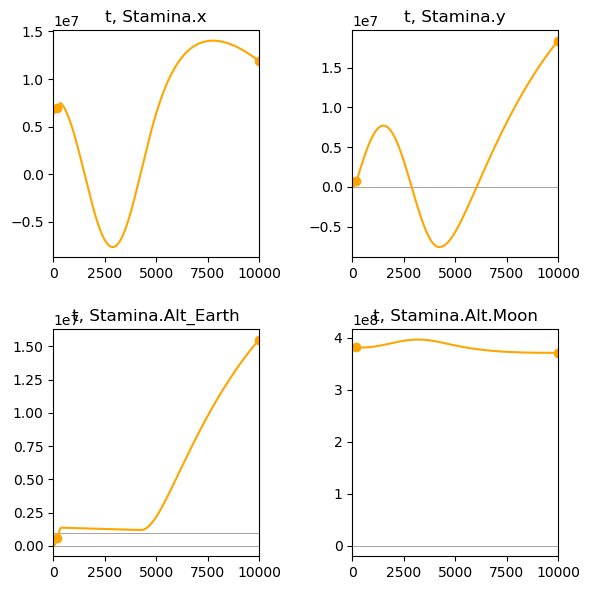

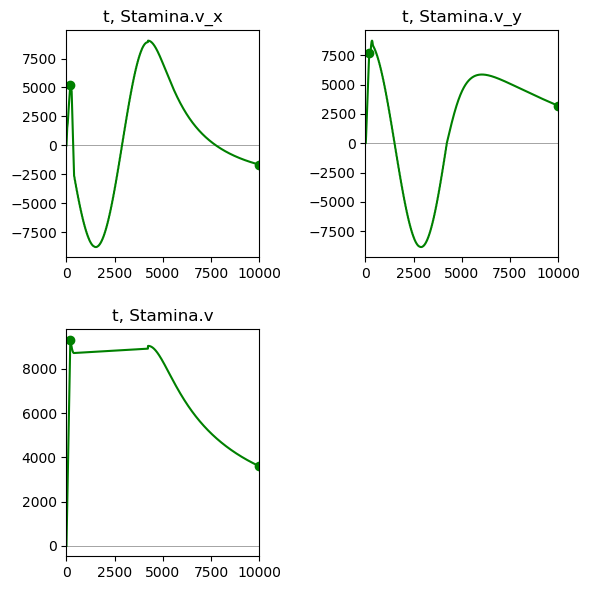

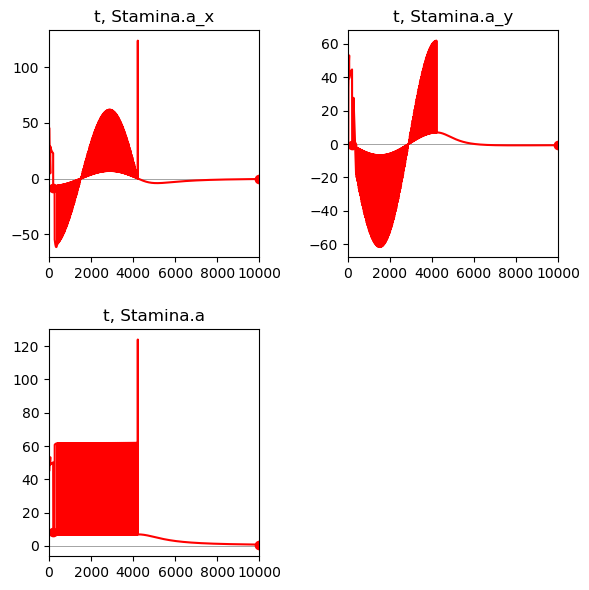

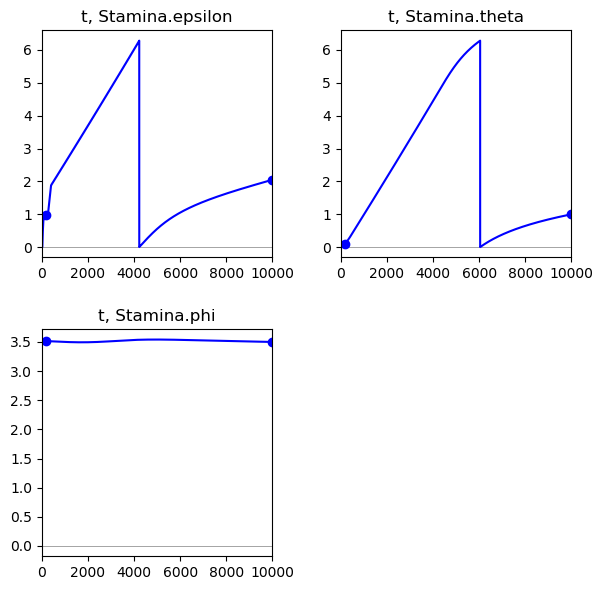

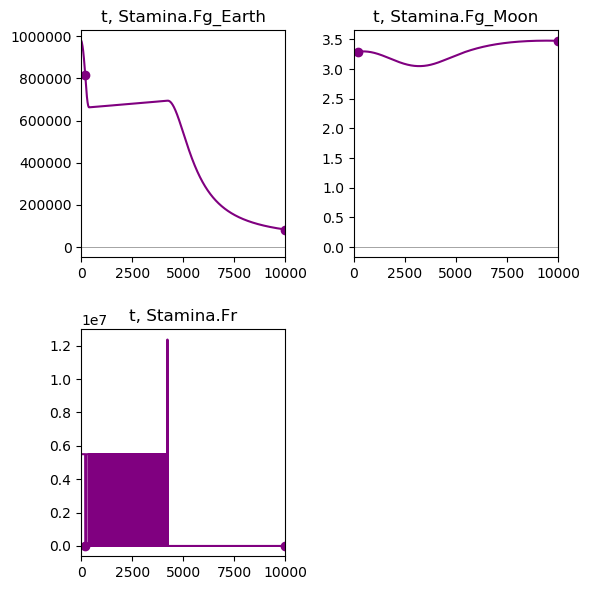

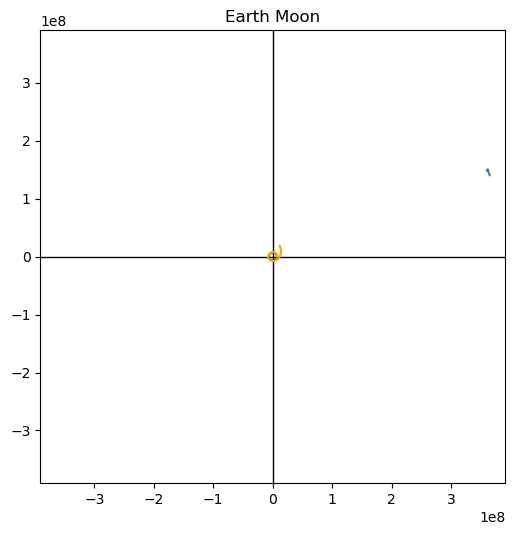

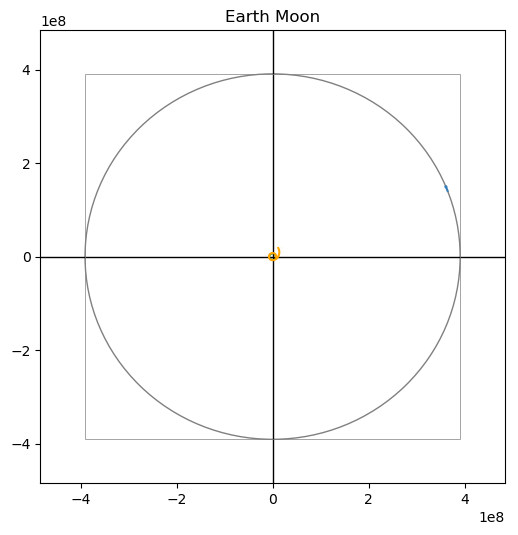

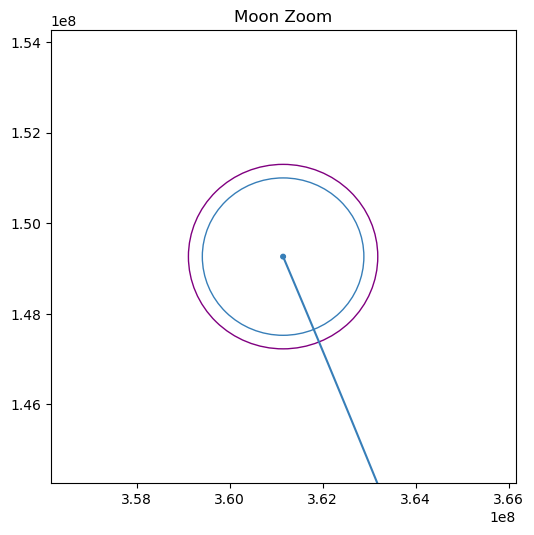

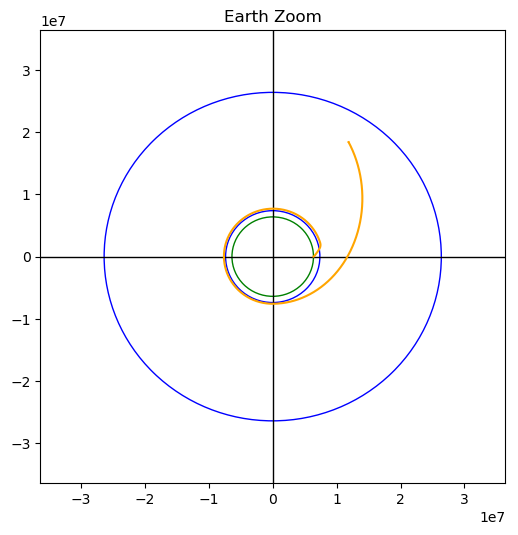

Didn't crash.


In [49]:
graphPosition()
graphVelocity()
graphAcceleration()
graphAngles()
graphForce()
#graphNearEarth()
#graphNearSurface()
graphEarthMoon_Exact()
graphEarthMoon_Margin()
graphNearMoon()
graphNearEarth()

if Stamina.crash:
    graphNearCrash()
    print "crash at", t[i+1], "s"
else:
    print "Didn't crash."
